<a href="https://colab.research.google.com/github/GouravSwain2566/CC-FEB-DATA_SCIENCE/blob/main/TASK_3_Price_Recommendation_for_Online_Sellers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from tqdm import tqdm
import re
import collections
from wordcloud import STOPWORDS
from scipy.sparse import csr_matrix
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from wordcloud import WordCloud
     

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/IR LAB/train.tsv', sep='\t')
test = pd.read_csv('/content/drive/MyDrive/IR LAB/test.tsv', sep='\t')
print("train data: ",train.shape)
print("test data: ",test.shape)

train data:  (1482535, 8)
test data:  (693359, 7)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


In [ ]:
train.head(10)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity
5,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma..."
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,NaN,8.0,0,I realized his pants are on backwards after th...


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693359 entries, 0 to 693358
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   test_id            693359 non-null  int64 
 1   name               693359 non-null  object
 2   item_condition_id  693359 non-null  int64 
 3   category_name      690301 non-null  object
 4   brand_name         397834 non-null  object
 5   shipping           693359 non-null  int64 
 6   item_description   693359 non-null  object
dtypes: int64(3), object(4)
memory usage: 37.0+ MB


In [ ]:
test.head(10)

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...
5,5,iPhone 6 Plus or 6s Plus Vodka pink case,1,"Electronics/Cell Phones & Accessories/Cases, C...",NaN,1,One Absolut Vodka in Pink for iPhone 6 Plus an...
6,6,Vintage Cameo Pendant & Brooch Pin,3,Women/Jewelry/Necklaces,Vintage,1,Two vintage Cameo pieces. 1. Silver metal Lock...
7,7,Rose Gold Stainless Steel Quartz Watch,1,Women/Women's Accessories/Watches,NaN,1,Brand new Price firm No trades Box included wi...
8,8,Daisy Marc Jacobs 3.4oz,3,Beauty/Fragrance/Women,MARC JACOBS,0,Brand new No box 100% authentic Firm price NO ...
9,9,Rose Brushes and Silicone Sponge,1,Beauty/Tools & Accessories/Makeup Brushes & Tools,NaN,1,All new. 12 pcs makeup brushes and one Silicon...


Tổng số nhãn hiệu là 4809


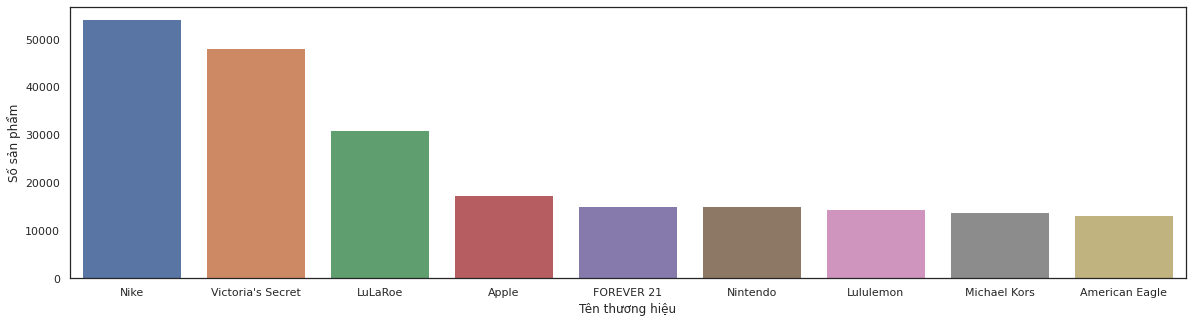

In [ ]:
unique_brands = train['brand_name'].value_counts()
print("Tổng số nhãn hiệu là {}".format(len(unique_brands)))
plt.figure(figsize=(20, 5))
sns.barplot(unique_brands.index[1:10], unique_brands[1:10])
plt.xlabel('Tên thương hiệu')
plt.ylabel('Số sản phẩm')
plt.show()

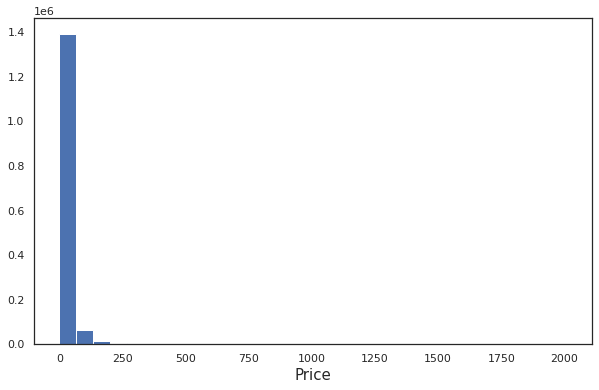

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(train.price,bins = 30, range = [min(train.price), max(train.price)],label="Price")
ax.set_xlabel('Price',fontsize=15)
plt.show()

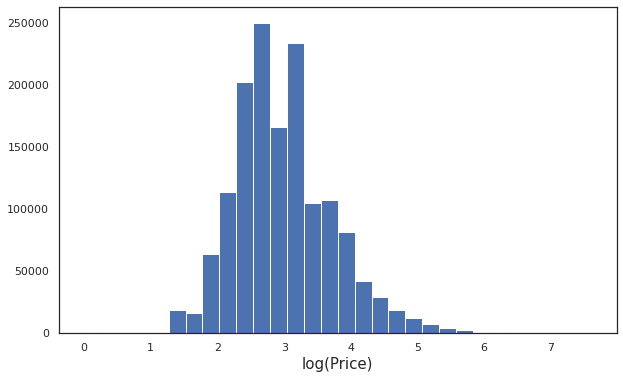

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(np.log1p(train['price']),bins = 30, range = [min(np.log1p(train['price'])), max(np.log1p(train['price']))],label="Price")
ax.set_xlabel('log(Price)',fontsize=15)
plt.show()

Text(0.5, 0, 'Điều kiện sản phẩm')

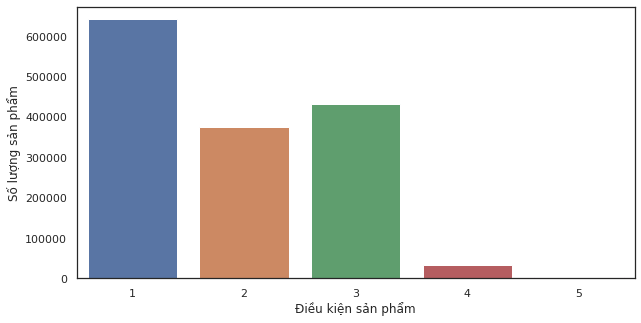

In [ ]:
count = train['item_condition_id'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(count.index[:5], count[:5])
plt.ylabel('Số lượng sản phẩm')
plt.xlabel('Điều kiện sản phẩm')

Text(0.5, 0, 'Phí ship')

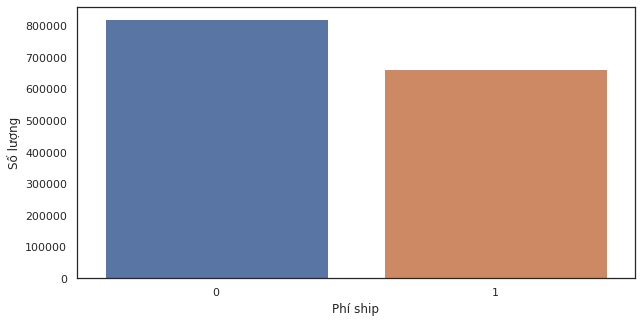

In [ ]:
count = train['shipping'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(count.index[:2], count[:2])
plt.ylabel('Số lượng')
plt.xlabel('Phí ship')

In [ ]:
def split_cat(text):
    try: return text.split("/")
    except: return ("None", "None", "None")
train['category_1'], train['category_2'], train['category_3'] = \
zip(*train['category_name'].apply(lambda x: split_cat(x)))
test['category_1'], test['category_2'], test['category_3'] = \
zip(*test['category_name'].apply(lambda x: split_cat(x)))

#coi lại dữ liệu sau khi tách
train.head(5)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category_1,category_2,category_3
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


In [ ]:
train.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
category_1                0
category_2                0
category_3                0
dtype: int64

In [ ]:
test.isnull().sum()

test_id                   0
name                      0
item_condition_id         0
category_name          3058
brand_name           295525
shipping                  0
item_description          0
category_1                0
category_2                0
category_3                0
dtype: int64

In [ ]:
def handle_missing(dataset):
    dataset.brand_name.fillna(value="None", inplace=True)
    dataset.item_description.fillna(value="None", inplace=True)
    dataset.category_name.fillna(value="None", inplace=True)
    return (dataset)

train = handle_missing(train)
test = handle_missing(test)

In [ ]:
train.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
category_1           0
category_2           0
category_3           0
dtype: int64

In [ ]:
def create_price_d(grouped, operation_name, orig_colname):
    price_d = {}
    for index, row in grouped.iterrows():
        price_d[row[orig_colname]] = row['price']
    return {orig_colname + "_" + operation_name: price_d}


# Tạo ra dữ liệu để tra cứu giá theo tên sản phẩm
price_d = {}    
for col in ['brand_name','category_1','category_2','category_3' ,'category_name']:
    price_d.update(create_price_d(train.groupby(col, as_index=False).min(), 'min', col))
    price_d.update(create_price_d(train.groupby(col, as_index=False).median(), 'median', col))
    price_d.update(create_price_d(train.groupby(col, as_index=False).mean(), 'mean', col))
    price_d.update(create_price_d(train.groupby(col, as_index=False).max(), 'max', col))

    
#Đưa các cột chứa giá sản phẩm vào data
def price_dt(dt, pricedicts):
    for col in ['brand_name','category_1','category_2','category_3','category_name']:
        for oper in ['_min', '_median', '_mean', '_max']:
            dt[col + oper] = dt[col].map(price_d[col + oper])
            dt[col + oper] = dt[col + oper].fillna(price_d[col + oper].get('Unknown', 5))

price_dt(train, price_dt)
price_dt(test, price_dt)

In [ ]:
train.head(5)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category_1,category_2,...,category_2_mean,category_2_max,category_3_min,category_3_median,category_3_mean,category_3_max,category_name_min,category_name_median,category_name_mean,category_name_max
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,None,10.0,1,No description yet,Men,Tops,...,18.999442,375.0,0.0,14.0,18.352495,309.0,0.0,14.0,18.352495,309.0
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,...,87.887754,1900.0,3.0,25.0,42.913900,750.0,3.0,25.0,42.913900,750.0
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,...,18.237514,1525.0,0.0,12.0,15.659676,329.0,0.0,12.0,15.660102,329.0
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,None,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,...,21.566301,848.0,0.0,16.0,22.185020,848.0,0.0,16.0,22.185020,848.0
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,None,44.0,0,Complete with certificate of authenticity,Women,Jewelry,...,27.501571,2004.0,0.0,12.0,25.587509,1747.0,0.0,12.0,25.587509,1747.0


In [ ]:
col = ['item_condition_id', 
       'shipping', 
      'brand_name_min', 
       'brand_name_max', 
       'brand_name_median', 
       'brand_name_mean', 
      'category_name_min', 
       'category_name_max', 
       'category_name_median', 
       'category_name_mean'
      ]

train_col = train[col]
train_pr = train[['price']]

test_col = test[col]